# Titanic attempt 4 (Hopefully final)

##imports needed

Many of these imports wont be used as some were only used in the testing of different methods and weresince found inferior for the code and dataset parameters used

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Importing datasets

In [ ]:
#importing the datasets to be used in the predction
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataset = train.append(test)

#Importing the same files to be used for the analysis as the code analysis
#changes the values in the variables
train_analysis = pd.read_csv("train.csv")
test_analysis = pd.read_csv("test.csv")
dataset_analysis = train.append(test)

## data analysis

This analysis lays the fondations to choose what parameters to use when training the model. The data that we will use for the prediction according to the anlaysis is: 	Pclass	Sex	 Sib_Sp 	Parch 	Fare  Age.
Embarked was considered but did not seem to have enough baring on the result to be worth keeping

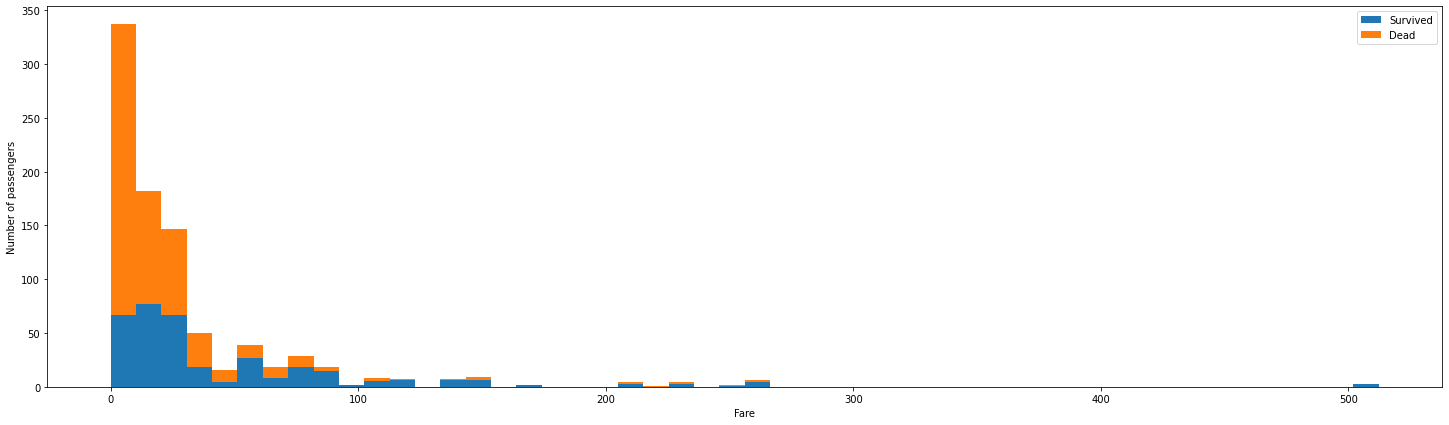

In [ ]:
fig = plt.figure(figsize=(25, 7))
plt.hist([train_analysis[train_analysis['Survived'] == 1]['Fare'], train_analysis[train_analysis['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

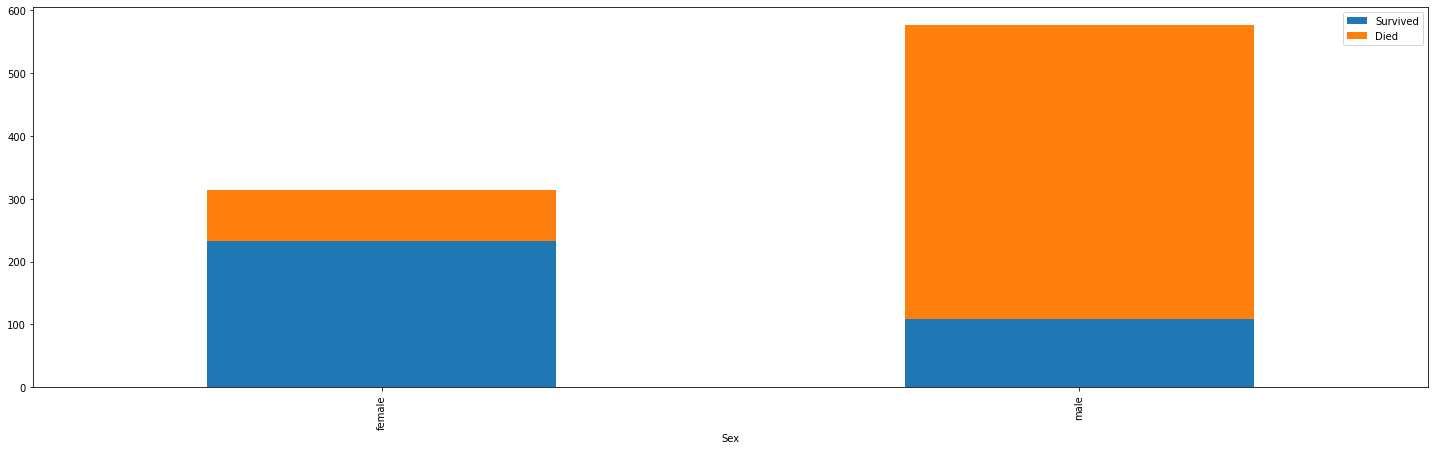

In [ ]:
train_analysis['Age'] = train_analysis['Age'].fillna(train['Age'].median())
train_analysis['Died'] = 1 - train_analysis['Survived']
train_analysis.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True);

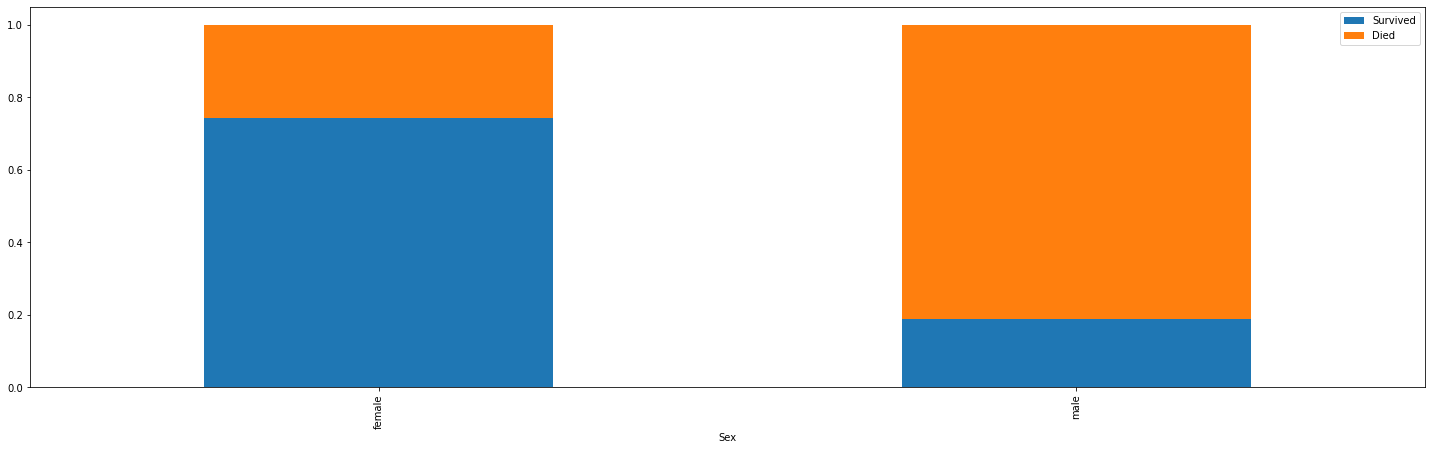

In [ ]:
train_analysis.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True);

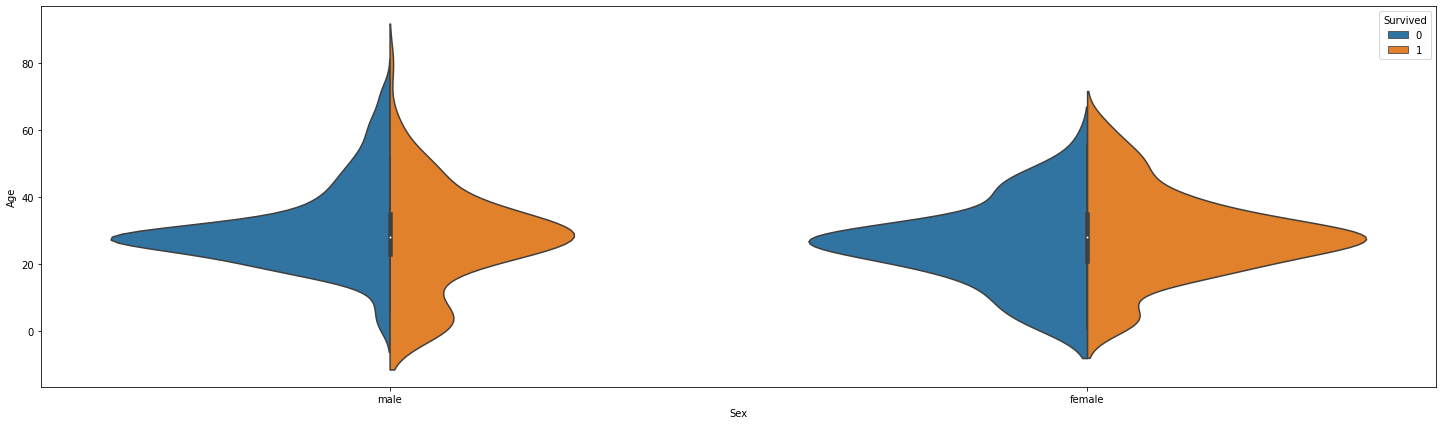

In [ ]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train_analysis, 
               split=True,
               );

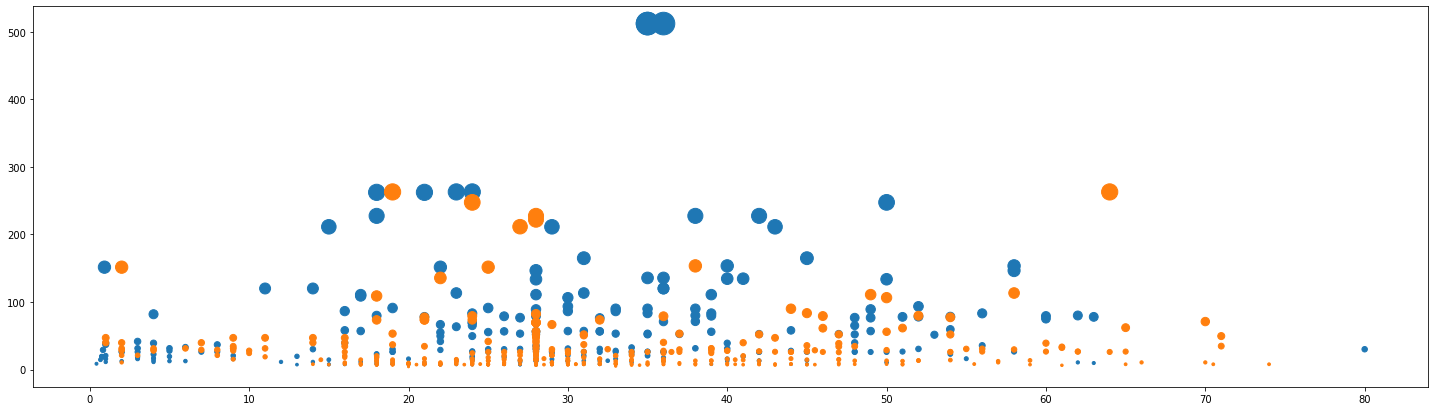

In [ ]:
plt.figure(figsize=(25, 7))
plo = plt.subplot()

plo.scatter(train_analysis[train_analysis['Survived'] == 1]['Age'], train_analysis[train_analysis['Survived'] == 1]['Fare'], s=train_analysis[train_analysis['Survived'] == 1]['Fare'])
plo.scatter(train_analysis[train_analysis['Survived'] == 0]['Age'], train_analysis[train_analysis['Survived'] == 0]['Fare'], s=train_analysis[train_analysis['Survived'] == 0]['Fare']);

#x axis = age
# y = fare

In [ ]:
sns.set()
def create_chart(feature):
    lived = train_analysis[train_analysis['Survived']==1][feature].value_counts()
    died = train_analysis[train_analysis['Survived']==0][feature].value_counts()
    df = pd.DataFrame([lived,died])
    df.index = ['Lived','Died']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    print(df)

           0      1
Lived    NaN  342.0
Died   549.0    NaN


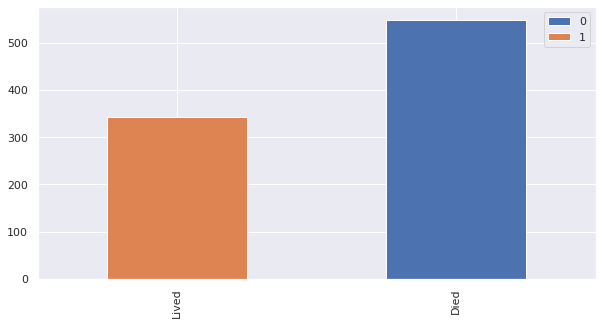

In [ ]:
create_chart("Survived")

         1   2    3
Lived  136  87  119
Died    80  97  372


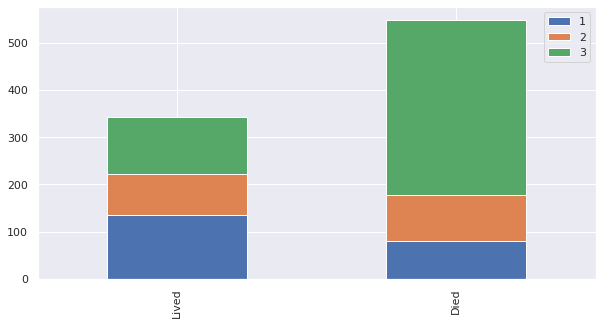

In [ ]:
create_chart("Pclass")

       female  male
Lived     233   109
Died       81   468


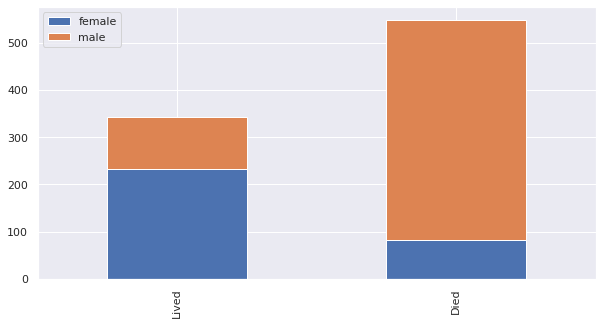

In [ ]:
create_chart("Sex")

           0      1     2     3     4    5    8
Lived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Died   398.0   97.0  15.0  12.0  15.0  5.0  7.0


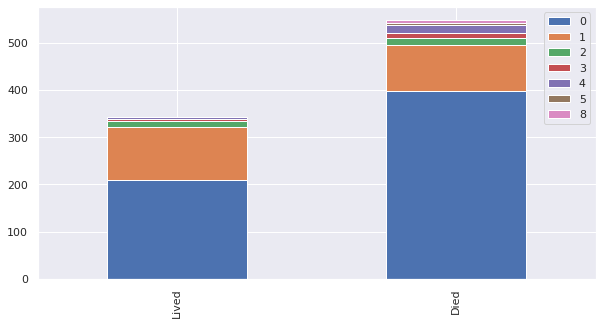

In [ ]:
create_chart('SibSp')

           0     1     2    3    4    5    6
Lived  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Died   445.0  53.0  40.0  2.0  4.0  4.0  1.0


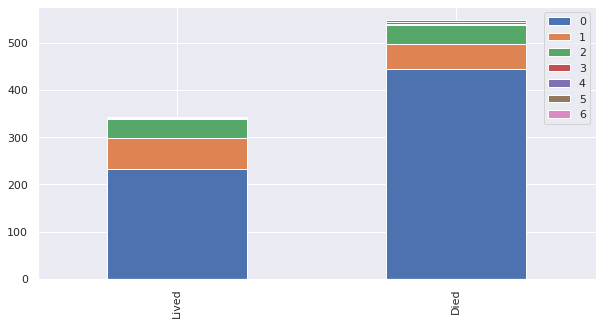

In [ ]:
create_chart('Parch')

         S   C   Q
Lived  217  93  30
Died   427  75  47


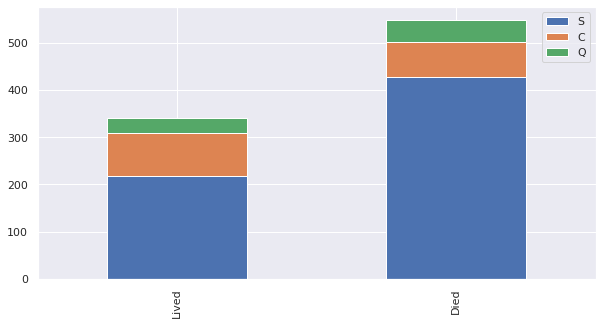

In [ ]:
create_chart('Embarked')

##Modifying data based of analysis findings

###Using title to fill in NaN ages (Title dropped afterwards)

In [ ]:
#mapping uncommon titles to common ones
mapping = {'Mlle': 'Miss',
           'Major': 'Mr',
           'Col': 'Mr',
           'Sir': 'Mr',
           'Don': 'Mr',
           'Mme': 'Miss',
          'Jonkheer': 'Mr',
           'Lady': 'Mrs',
           'Capt': 'Mr',
           'Countess': 'Mrs',
           'Ms': 'Miss',
           'Dona': 'Mrs'
           }

#Extracts the titles from the names
dataset['Title'] = dataset['Name']
for i in dataset['Name']:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True)

#uses extracted titles and replaces them with the mapping dictionary values 
dataset.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for t in titles:
#for each title if the value for age is NaN then add the median of all age values
    age = dataset.groupby('Title')['Age'].median()[titles.index(t)]
    dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == t), 'Age'] = age

#applies changes to train and test set
train['Age'] = dataset['Age'][:891]
test['Age'] = dataset['Age'][891:]

#dataset.drop('Title', axis = 1, inplace = True)

###creating Family_Size

In [ ]:
#creates a new column 'Family_Size' from adding parcha dn sibsp
dataset['Family_Size'] = dataset['Parch'] + dataset['SibSp']
#applies change to sets 
train['Family_Size'] = dataset['Family_Size'][:891]
test['Family_Size'] = dataset['Family_Size'][891:]

### Getting family survival data (taken and modified from ShunjiangXu's Notebook https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever)

In [ ]:
dataset['Last_Name'] = dataset['Name'].apply(lambda x: str.split(x, ",")[0])
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
dataset['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in dataset[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      dataset.loc[dataset['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [ ]:
for _, grp_df in dataset.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(dataset[dataset['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train['Family_Survival'] = dataset['Family_Survival'][:891]
test['Family_Survival'] = dataset['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


### Fare bins

fills NaN values in fare and replaces fare with FareNew that has values upto 5 for catagorisation

In [ ]:
#fills NaN values with median of fares
dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
#creates new column to catagorise values
dataset['Fare2'] = pd.qcut(dataset['Fare'], 5)
label = LabelEncoder()
#applies encoded values of Fare2 to FareNew and applies FareNew to to train and test set
dataset['FareNew'] = label.fit_transform(dataset['Fare2'])
train['FareNew'] = dataset['FareNew'][:891]
test['FareNew'] = dataset['FareNew'][891:]
train.drop(['Fare'], 1, inplace=True)
test.drop(['Fare'], 1, inplace=True)

###Age Bins

same as Fare Bins but no need to fill NaN values as that has already been done

In [ ]:
dataset['Age2'] = pd.qcut(dataset['Age'], 4)
label = LabelEncoder()
dataset['AgeNew'] = label.fit_transform(dataset['Age2'])
train['AgeNew'] = dataset['AgeNew'][:891]
test['AgeNew'] = dataset['AgeNew'][891:]
train.drop(['Age'], 1, inplace=True)
test.drop(['Age'], 1, inplace=True)

### Changing Sex values to binary values

In [ ]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Sex'].replace(['male','female'],[0,1],inplace=True)

###Dropping unused data

In [ ]:
train.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [ ]:
train.head(3)

Survived  Pclass  Sex  Family_Size  Family_Survival  FareNew  AgeNew
0         0       3    0            1              0.5        0       0
1         1       1    1            1              0.5        4       3
2         1       3    1            0              0.5        1       1

## TRAINING!

### assigning train set, test set and applying feature scaling to the values

In [ ]:
#X=train set
#Y=test answers for X
#X_test=test set
X = train.drop('Survived', 1)
y = train['Survived']
X_test = test.copy()

In [ ]:
#feature scaling
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

### predicting best algorithm parameters

I used GridSearchCV to determine the best parameters to use in the K nearest neighbors algorithm to save time trying individual params

In [ ]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8783125088419206
KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   12.6s finished


In [ ]:
#applies params returned by GridSearchCV and applies it to X_test
gd.best_estimator_.fit(X, y)
y_pred = gd.best_estimator_.predict(X_test)

###Writing to csv

In [ ]:
z = pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
z['Survived'] = y_pred
z.to_csv("submission.csv", index = False)